In [42]:
#Data Import
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

#Math
import math

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

#Machine Learning import
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

#Dataset import
import statsmodels.api as sm

Basic math overview

Text(0.5,1,'Logistic function')

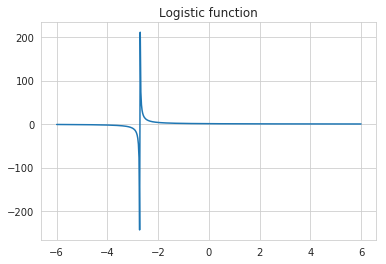

In [43]:
#Logistic function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)) * t)

t = np.linspace(-6,6,500)

y = np.array([logistic(ele) for ele in t])

plt.plot(t,y)
plt.title("Logistic function")

Data analysis

In [44]:
df = sm.datasets.fair.load_pandas().data

In [45]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [46]:
def check_affair(x):
    if x != 0:
        return 1
    else:
        return 0

In [47]:
df["Had_affair"] = df["affairs"].apply(check_affair)

In [48]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


0    4313
1    2053
Name: Had_affair, dtype: int64


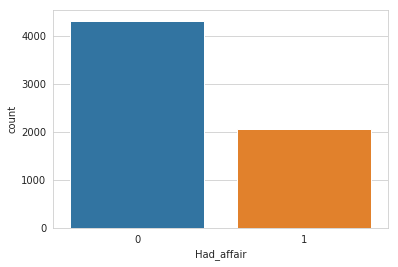

In [49]:
print(df['Had_affair'].value_counts())
sns.countplot("Had_affair",data=df)

In [50]:
df.groupby("Had_affair").mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


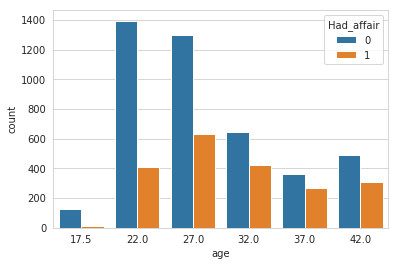

In [51]:
sns.countplot("age",data=df,hue="Had_affair")

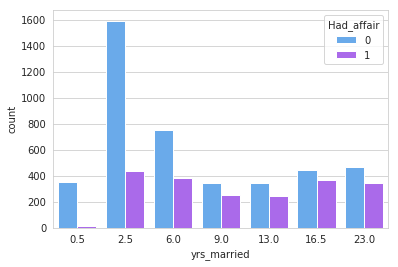

In [52]:
sns.countplot("yrs_married",data=df,hue="Had_affair",palette="cool")

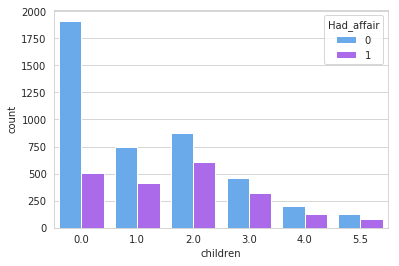

In [53]:
sns.countplot("children",data=df,hue="Had_affair",palette="cool")

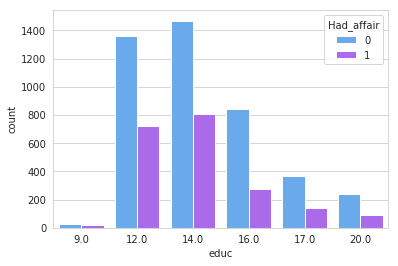

In [54]:
sns.countplot("educ",data=df,hue="Had_affair",palette="cool")

Data Preparation

In [55]:
occ_dummies = pd.get_dummies(df['occupation'])

In [56]:
hus_occ_dummies = pd.get_dummies(df["occupation_husb"])

In [57]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [58]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns =  ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [59]:
X = df.drop(["occupation","occupation_husb","Had_affair"], axis = 1)

In [60]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis = 1)

In [61]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [62]:
X = pd.concat([X,dummies],axis=1)

In [63]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [64]:
Y = df.Had_affair

In [65]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_affair, dtype: int64

Multicollinearity Consideration

In [67]:
X = X.drop(["occ1","hocc1","affairs"],axis=1) #Dropping affairs because we already have the "Had_affair" column!

In [68]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [71]:
Y = np.ravel(Y) #Flatten the column to get an array
Y

array([1, 1, 1, ..., 0, 0, 0])

In [72]:
log_model = LogisticRegression()

In [75]:
log_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
log_model.score(X,Y)

0.7258875274897895

In [77]:
Y.mean() # % of the woman having affairs

0.3224945020420987

This means that if our model simply guessed only "no affair", we would have had 1-0.32 = 0.68 accuracy (68%). So while we are doing better than the null error rate, we are not doing that much better.

In [78]:
coeff_df = DataFrame(np.transpose(log_model.coef_),X.columns)

In [80]:
coeff_df

,0
rate_marriage,-0.697924
age,-0.056365
yrs_married,0.103919
children,0.018162
religious,-0.368518
educ,0.008755
occ2,0.298052
occ3,0.607993
occ4,0.346222
occ5,0.942505


Testing and Training data

In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
log_model2 = LogisticRegression()
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
class_predict = log_model2.predict(X_test)

In [85]:
print (metrics.accuracy_score(Y_test,class_predict))

0.7324120603015075


We are not doing that much better than the previous one!